In [23]:
using TaylorIntegration, ValidatedNumerics, TaylorSeries
using Plots, LaTeXStrings
# plotly()
pyplot(grid = :false, legend = :false)

Plots.PyPlotBackend()

In [2]:
const λ = 1.0
const Z = 2.0
const order = 28
const t0 = 0.0
const t_max = 0.5 
const abs_tol = 1.0E-20
const steps = 500000

500000

In [123]:
function undrivenHelium(τ, q)
    t, Q₁, P₁, Q₂, P₂ = q
    
    t = Q₁^2*Q₂^2
    q₁ = 0.25*Q₂^2*P₁
    p₁ = 2Q₁*(-0.125P₂^2 + Z  - Q₂^2 + Q₂^2/abs(Q₁^2 - Q₂^2)) + Q₁^2*Q₂^2*(1/(Q₁^2 - Q₂^2)^2)*2Q₁
    q₂ = 0.25*Q₁^2*P₂
    p₂ = 2Q₂*(-0.125P₁^2 + Z  - Q₁^2 + Q₁^2/abs(Q₁^2 - Q₂^2)) - Q₁^2*Q₂^2*(1/(Q₁^2 - Q₂^2)^2)*2Q₂

    return [t, q₁, p₁, q₂, p₂] 

end
undrivenHelium(v) = undrivenHelium(v[1], v[2:5])

undrivenHelium (generic function with 2 methods)

The Taylor integration:

In [30]:
f(x, y) = x^2 + y^2

f (generic function with 1 method)

In [32]:
x, y = set_variables("x y")

2-element Array{TaylorSeries.TaylorN{Float64},1}:
  1.0 x + 𝒪(‖x‖⁷)
  1.0 y + 𝒪(‖x‖⁷)

In [125]:
var1 = set_variables("t q1 p1 q2 p2", order = 1)

5-element Array{TaylorSeries.TaylorN{Float64},1}:
   1.0 t + 𝒪(‖x‖²)
  1.0 q1 + 𝒪(‖x‖²)
  1.0 p1 + 𝒪(‖x‖²)
  1.0 q2 + 𝒪(‖x‖²)
  1.0 p2 + 𝒪(‖x‖²)

In [128]:
regHam(t, q1+ 1.44914, p1 + 2.17371, q2, p2 + 4.0)

 2.1000067396000004 p2 + 𝒪(‖x‖²)

In [130]:
?TaylorN

search: TaylorN taylorinteg TaylorIntegration show_params_TaylorN Taylor1



```
TaylorN{T<:Number} <: Number
```

DataType for polynomial expansions in many (>1) independent variables.

**Fields:**

  * `coeffs  :: Array{HomogeneousPolynomial{T},1}` Vector containing the

`HomogeneousPolynomial` entries. The $i$-th component corresponds to the homogeneous polynomial of degree $i-1$.

  * `order   :: Int`  maximum order of the polynomial expansion.

```
TaylorN(T, nv; [order=get_order()])
TaylorN(nv; [order=get_order()])
```

Shortcut to define the `nv`-th independent `TaylorN{T}` variable as a polynomial. The order is defined through the keyword parameter `order`, whose default corresponds to `get_order()`. If `T::Type` is ommitted, `Float64` is assumend.


In [51]:
derivative(regHam(t, q1+ 1.44914, p1 + 2.17371, q2, p2 + 4.0), 5)

 2.1000067396000004 + 𝒪(‖x‖²)

In [53]:
q[2,:]

5-element Array{Float64,1}:
 0.00569683
 1.45061   
 2.17239   
 0.257709  
 4.00971   

In [4]:
function condini(x10::Float64, px10::Float64)
    @assert x10 != 0
    Q1 = sqrt(x10)
    Q2 = 0.0
    P1 = px10*sqrt(x10)    
    P2 = sqrt(8Z)    
    return [0, Q1, P1, Q2, P2]
end

condini (generic function with 1 method)

In [5]:
function regHam(t, Q₁, P₁, Q₂, P₂)
    #Cantidades auxiliares
    P₁² = P₁^2
    P₂² = P₂^2
    Q₁² = Q₁^2
    Q₂² = Q₂^2
    nf = abs((Q₁)^2 - (Q₂)^2)
    
    H = 0.125*(P₁²*Q₂² + P₂²*Q₁²) - Z*(Q₁² + Q₂²) + Q₁²*Q₂²*(1.0 + 1.0/nf)
    return H
end


regHam(v) = regHam(v...)

regHam (generic function with 2 methods)

In [124]:
regHam(rand(5))

-0.9917703555758193

In [ ]:
function errHam(N::Int)
    dE = zeros(N)
    for j in 1:N
        al = rand(5)
        alt = al + var1
        
end

In [118]:
q0 = condini(100.4, -4.0)

5-element Array{Float64,1}:
   0.0   
  10.02  
 -40.0799
   0.0   
   4.0   

In [119]:
regHam(q0)

0.0

In [120]:
t, q = taylorinteg(undrivenHelium, q0, t0, 0.01, order, abs_tol, maxsteps=2); #warm-up lap
@time t, q = taylorinteg(undrivenHelium, q0, t0, 100.0, order, abs_tol, maxsteps=steps);

182.538442 seconds (2.47 G allocations: 230.480 GB, 21.80% gc time)


The final state:

In [111]:
t[end], q[end,:]

(100.0,[77447.4,31.6161,-0.0809286,0.993457,2.85097])

In [112]:
regHam(q[2,:])

2.0791688171671012

In [113]:
length(t), size(q)

(68798,(68798,5))

In [114]:
length

length (generic function with 95 methods)

In [115]:
ene = zeros(t)
for j in eachindex(ene)
    ene[j] = regHam(q[j,:])
end


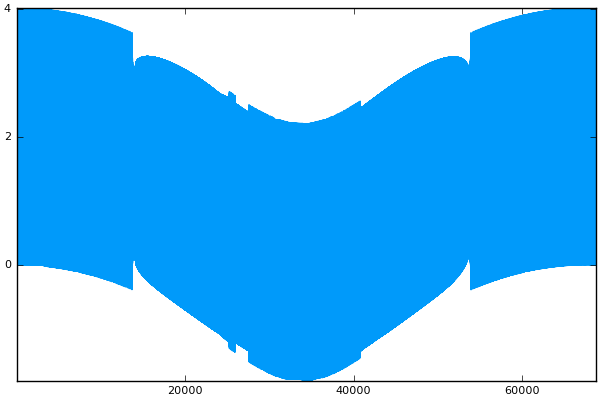

In [116]:
plot(eachindex(ene), ene)